In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from utils import generate_costs
from ef import prob_ef1_cost, alpha_ef1_cost, em1_abs_gaussian_cost_matrix
plt.style.use('seaborn-darkgrid')

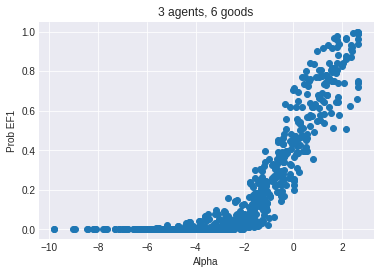

In [7]:
def generate_random(n_agents:int, n_goods:int):
    return np.exp(np.random.normal(0,1,(n_agents, n_goods))), np.exp(np.random.normal(0,1,(n_agents, n_goods)))

n_agents = 3
n_goods = 6
agent_means, agent_stds = generate_random(n_agents, n_goods)
probs_ef1, _ = generate_costs(agent_means, agent_stds, prob_ef1_cost)
alpha_ef1_vals, _ = generate_costs(agent_means, agent_stds, alpha_ef1_cost)

colors = np.random.rand(len(alpha_ef1_vals), 3)
plt.title(str(n_agents)+" agents, "+str(n_goods)+" goods")
plt.scatter(alpha_ef1_vals, probs_ef1)
plt.xlabel("Alpha")
plt.ylabel("Prob EF1")
plt.show()

# em1_vals, _ = generate_costs(agent_means, agent_stds, em1_abs_gaussian_cost_matrix)
# em1_min_vals = np.min(np.min(em1_vals, axis=1), axis=1)
# plt.title(str(n_agents)+" agents, "+str(n_goods)+" goods")
# plt.scatter(em1_min_vals, probs_ef1)
# plt.title("Min pair vs Prob EF1")
# plt.xlabel("Min pair EF1")
# plt.ylabel("Prob EF1")
# plt.show()

100%|██████████| 100/100 [03:12<00:00,  1.93s/it]


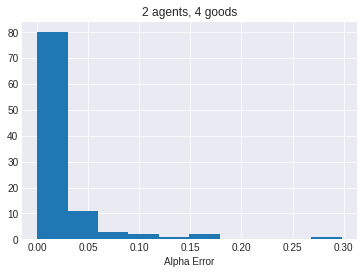

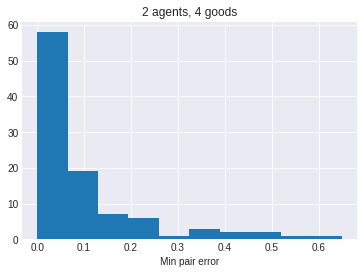

In [8]:
n_agents = 2
n_goods = 4
alpha_errors = []
em1_min_errors = []

for _ in tqdm(range(100)):
    agent_means, agent_stds = generate_random(n_agents, n_goods)
    probs_ef1, allocs = generate_costs(agent_means, agent_stds, prob_ef1)
    alpha_ef1_vals, _ = generate_costs(agent_means, agent_stds, alpha_ef1)
    em1_vals, _ = generate_costs(agent_means, agent_stds, em1_abs_gaussian_cost_matrix)
    em1_prod = np.min(np.min(em1_vals, axis=1), axis=1)
    best_idx = np.argmax(probs_ef1)
    best_alpha_idx = np.argmax(alpha_ef1_vals)
    best_prod_idx = np.argmax(em1_prod)

    alpha_errors.append(abs(probs_ef1[best_idx] - probs_ef1[best_alpha_idx]))
    em1_min_errors.append(abs(probs_ef1[best_idx] - probs_ef1[best_prod_idx]))

plt.title(str(n_agents)+" agents, "+str(n_goods)+" goods")
plt.hist(alpha_errors)
plt.xlabel("Alpha Error")
plt.show()

plt.title(str(n_agents)+" agents, "+str(n_goods)+" goods")
plt.hist(em1_min_errors)
plt.xlabel("Min pair error")
plt.show()

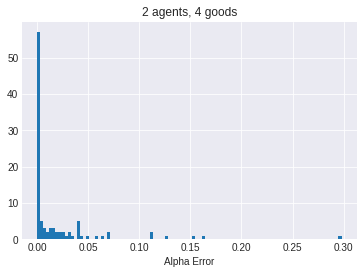

In [10]:
plt.title(str(n_agents)+" agents, "+str(n_goods)+" goods")
plt.hist(alpha_errors, bins=100)
plt.xlabel("Alpha Error")
plt.show()

In [6]:
np.mean(em1_prod_errors), np.std(em1_prod_errors)

(0.10402000000000002, 0.14986280258956858)